In [1]:
# Import statements
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

from sklearn import metrics

# Models
from sklearn.linear_model import SGDClassifier # SGD model

In [2]:
# Reading into data frame from file
data_frame = pd.read_csv("../../data/dupes_dropped_creditcard.csv")

In [3]:
# Load models from files if desired
from pickle import load
load_models = False
save_models = False

if load_models:
    with open("SGDClassifier_model.pkl", "rb") as file:
        clf = load(file)
    with open("SGDClassifier_model_resampled.pkl", "rb") as file:
        clf_standard_scaled = load(file)
else:
    clf, clf_standard_scaled = None, None

In [4]:
# Data to fit and targets
old_feature_set = ["Time", "V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10", "V11", "V12", "V13", "V14", "V15", "V16", "V17", "V18", "V19", "V20", "V21", "V22", "V23", "V24", "V25", "V26", "V27", "V28", "Amount"]
feature_set = ["V10", "V11", "V12", "V14", "V16", "V17"]

target_set = ["Class"]

X = data_frame[feature_set]
y = data_frame[target_set]

In [5]:
# Splits data into 80-20 train-test
# Prevents data leakage (where training and test sets influence each other in scaling)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [6]:
# Scale features
standard_scaler = StandardScaler()

# Standard scaling
X_train_standard_scaled = standard_scaler.fit_transform(X_train)
X_test_standard_scaled = standard_scaler.transform(X_test)

In [7]:
# # Balancing data set with resampling

# # Separate majority and minority classes in training set
# X_train_majority = X_train[y_train["Class"] == 0]
# y_train_majority = y_train[y_train["Class"] == 0]
# X_train_minority = X_train[y_train["Class"] == 1]
# y_train_minority = y_train[y_train["Class"] == 1]

# # Oversample minority class
# X_minority_upsampled, y_minority_upsampled = resample(
#     X_train_minority, y_train_minority,
#     replace=True,                      # sample with replacement
#     n_samples=len(y_train_majority),  # match majority class
#     random_state=1
# )

# # Combine majority and upsampled minority
# X_train_resampled = pd.concat((X_train_majority, X_minority_upsampled))
# y_train_resampled = pd.concat((y_train_majority, y_minority_upsampled))

In [8]:
# # Balancing data set with resampling ON SCALED DATA

# # Separate majority and minority classes in training set
# X_train_majority_standard_scaled = X_train_standard_scaled[y_train["Class"] == 0]
# X_train_minority_standard_scaled = X_train_standard_scaled[y_train["Class"] == 1]

# # Oversample minority class
# X_minority_upsampled_standard_scaled, y_minority_upsampled = resample(
#     X_train_minority_standard_scaled, y_train_minority,
#     replace=True,                      # sample with replacement
#     n_samples=len(y_train_majority),  # match majority class
#     random_state=1
# )

# # Combine majority and upsampled minority
# X_train_resampled_standard_scaled = pd.concat((X_train_majority_standard_scaled, X_minority_upsampled_standard_scaled))
# y_train_resampled = pd.concat((y_train_majority, y_minority_upsampled))

In [12]:
# Initialize model(s)
if clf == None:
    clf = SGDClassifier(loss='squared_hinge', penalty='l1', random_state=1) # Apparently prefers standard scaling
if clf_standard_scaled == None:
    clf_standard_scaled = SGDClassifier(loss='squared_hinge', penalty='l1', random_state=1)

In [13]:
# Collect predictions from non-resample trained model
clf.fit(X_train, y_train.values.ravel())
y_pred = clf.predict(X_test)

# Collect predictions from resample trained model
# clf_resampled.fit(X_train_resampled, y_train_resampled)
# y_resampled_pred = clf_resampled.predict(X_test)

# Collect predictions from non-resample trained model (standard scaled)
clf_standard_scaled.fit(X_train_standard_scaled, y_train.values.ravel())
y_standard_scale_pred = clf_standard_scaled.predict(X_test_standard_scaled)

# Collect predictions from resample trained model (standard scaled)
# clf_resampled.fit(X_train_resampled_standard_scaled, y_train_resampled)
# y_standard_scale_resampled_pred = clf_resampled.predict(X_test_standard_scaled)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.87      0.55      0.67        95

    accuracy                           1.00     56746
   macro avg       0.93      0.77      0.84     56746
weighted avg       1.00      1.00      1.00     56746



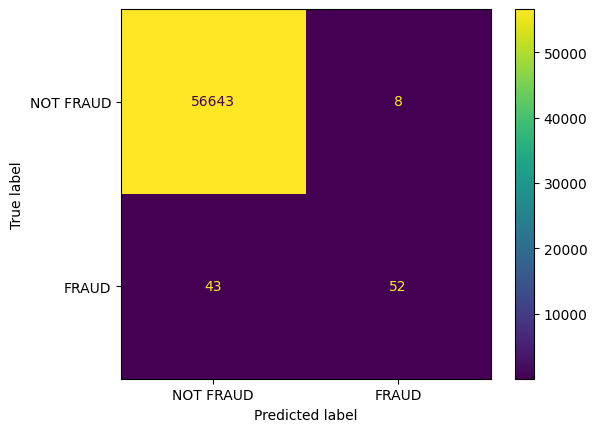

In [14]:
print(metrics.classification_report(y_test, y_pred))
cm = metrics.confusion_matrix(y_test, y_pred)
metrics.ConfusionMatrixDisplay(cm, display_labels=["NOT FRAUD", "FRAUD"]).plot()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.89      0.58      0.70        95

    accuracy                           1.00     56746
   macro avg       0.94      0.79      0.85     56746
weighted avg       1.00      1.00      1.00     56746



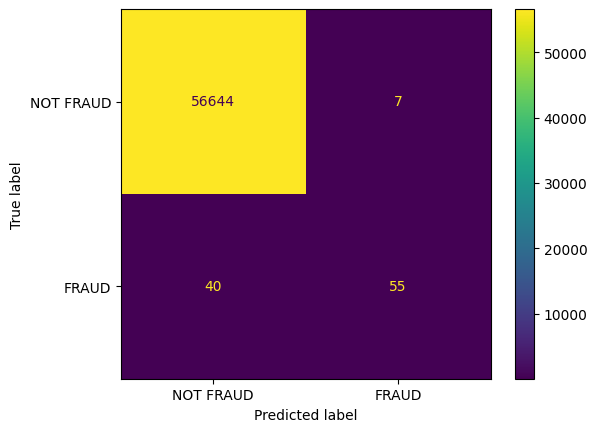

In [15]:
print(metrics.classification_report(y_test, y_standard_scale_pred))
cm_scaled = metrics.confusion_matrix(y_test, y_standard_scale_pred)
metrics.ConfusionMatrixDisplay(cm_scaled, display_labels=["NOT FRAUD", "FRAUD"]).plot()